# Extracting information from dataset


This notebook presents a case study to retrieve information from MazurkaBL dataset, provide tools to visualise it and imports models for dataset analysis.

## Import libraries

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as bd
from data_processing import prepare_dataset, plot_beat_dyn, plot_dyn_with_markings_values_boxplots


## Retrieve MazurkaBL dataset

In [2]:
files_beat = glob.glob('../beat_time/*.csv')
files_dyn = glob.glob('../beat_dyn/*.csv')
files_mark = glob.glob('../markings/*.csv')
files_mark_dyn = glob.glob('../markings_dyn/*.csv')

Mazurka_info = prepare_dataset(files_beat, files_dyn, files_mark, files_mark_dyn)

Retrieving information from the csv files...


In [3]:
# Print out stuff

pianist_ID = Mazurka_info['M17-3'][3].id
pianist_timing = Mazurka_info['M17-3'][3].beat
pianist_dynamics = Mazurka_info['M17-3'][3].dyn
# pianist_sones = Mazurka_info['M06-3'][3].sones


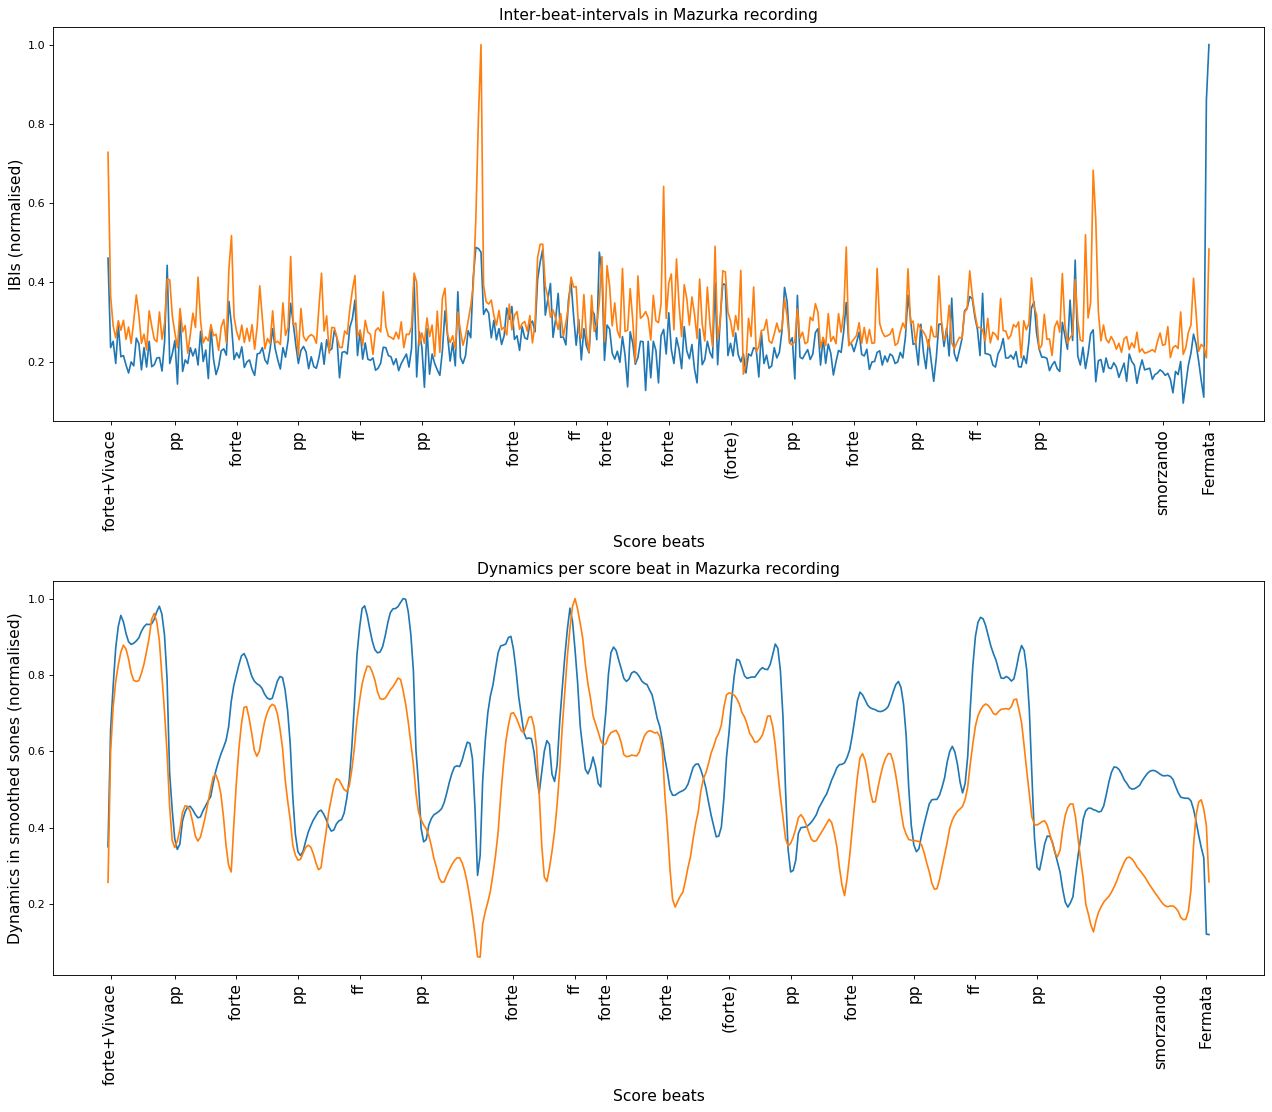

In [4]:
plot_beat_dyn(Mazurka_info['M33-2'][3:5])

In [5]:
# get_markings_dyn_values(Mazurka_info)

[0.136, 0.155, 0.126, 0.088, 0.195, 0.162, 0.083, 0.116, 0.093, 0.118, 0.191, 0.127, 0.132, 0.093, 0.124, 0.13, 0.121, 0.116, 0.082, 0.144, 0.136, 0.157, 0.252, 0.217, 0.123, 0.138, 0.165, 0.196, 0.054, 0.209, 0.121, 0.141, 0.154, 0.174]
[0.307, 0.374, 0.584, 0.338, 0.535, 0.476, 0.224, 0.855, 0.469, 0.366, 0.445, 0.217, 0.311, 0.205, 0.895, 0.417, 0.308, 0.463, 0.492, 0.32, 0.319, 0.504, 0.415, 0.71, 0.312, 0.497, 0.557, 0.489, 0.126, 0.578, 0.471, 0.354, 0.351, 0.567]
[0.488, 0.569, 0.529, 0.48, 0.624, 0.534, 0.347, 0.415, 0.334, 0.279, 0.67, 0.416, 0.603, 0.352, 0.549, 0.305, 0.448, 0.436, 0.42, 0.36, 0.502, 0.502, 0.693, 0.675, 0.321, 0.687, 0.475, 0.592, 0.381, 0.488, 0.715, 0.512, 0.828, 0.604]
[0.238, 0.301, 0.23, 0.156, 0.331, 0.252, 0.153, 0.273, 0.19, 0.129, 0.324, 0.184, 0.223, 0.137, 0.271, 0.141, 0.234, 0.189, 0.271, 0.299, 0.282, 0.288, 0.332, 0.37, 0.293, 0.297, 0.26, 0.321, 0.161, 0.381, 0.204, 0.297, 0.29, 0.249]
[0.229, 0.425, 0.268, 0.176, 0.345, 0.467, 0.183, 0.401,

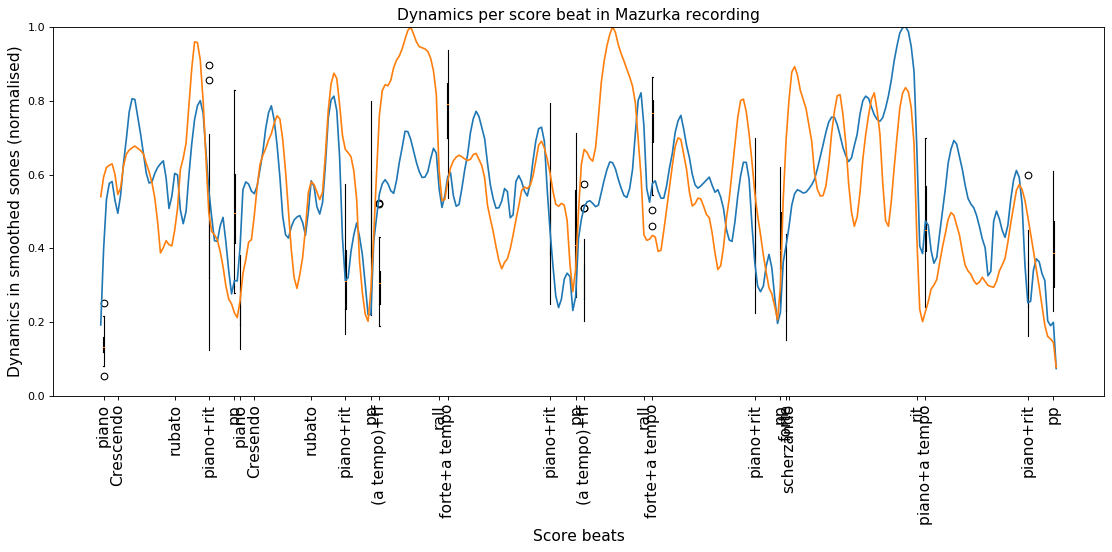

In [6]:
plot_dyn_with_markings_values_boxplots(Mazurka_info['M06-1'], 1, 3)